In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

folder = '../data'
merge_file = 'pilot1'
plot_folder = '../plots/pilot1'

df =pd.read_csv(os.path.join(folder, f'{merge_file}_player_round_slim.csv'))
print(len(df))

3092


In [19]:
df['session'].value_counts() / 4 / 8 / 2

dbcrara4    21.3750
mqqsqhav    20.9375
yi3xaim0     6.0000
Name: session, dtype: float64

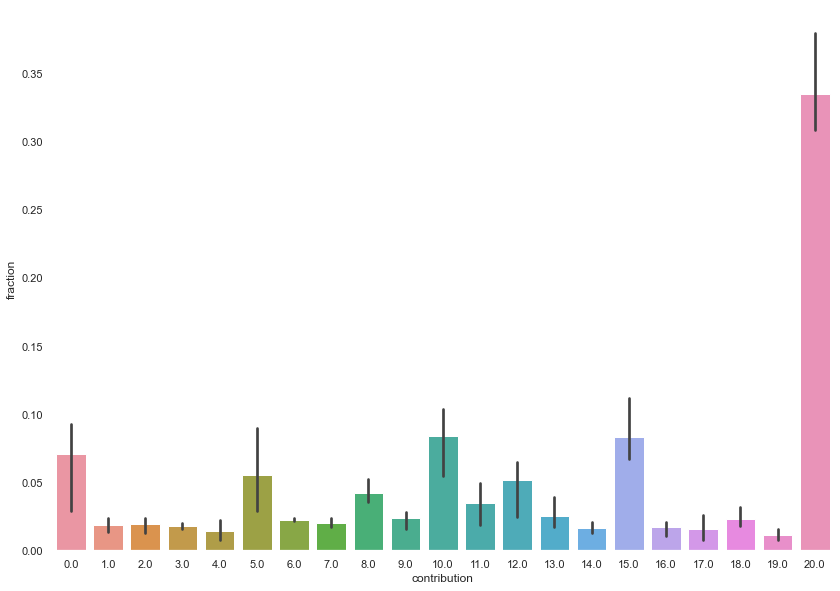

In [20]:
plt.figure(figsize=(14,10))
dfg = df.groupby(['session'])['contribution'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='contribution', y='fraction')
plt.savefig(os.path.join(plot_folder, 'distribution_contribution.jpg'), dpi=300, transparent=False)

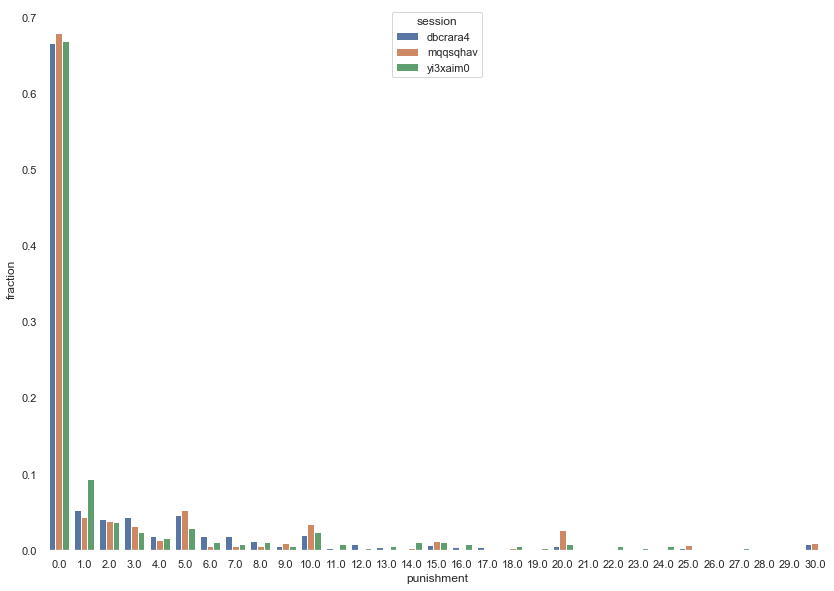

In [21]:
plt.figure(figsize=(14,10))
dfg = df.groupby(['session'])['punishment'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='punishment', y='fraction', hue='session')
plt.savefig(os.path.join(plot_folder, 'distribution_punishments.jpg'), dpi=300, transparent=False)